In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
for i in range(len(glob("/content/train/*.jpg"))):
  print(i)
# Image.open('/content/train/*.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# กำหนดขนาดรูปภาพที่ต้องการ resize (300, 400)
size = (224, 224)

# กำหนด path ของโฟลเดอร์ที่เก็บรูปภาพ
path = "/content/train"

# วนลูปอ่านและ resize รูปภาพทุกภาพในโฟลเดอร์
for file_name in os.listdir(path):
    if file_name.endswith(".jpg") or file_name.endswith(".jpeg") or file_name.endswith(".png"):
        # อ่านรูปภาพ
        img = Image.open(os.path.join(path, file_name))

        # resize รูปภาพ
        img_resized = img.resize(size)

        # บันทึกรูปภาพที่ resize เรียบร้อยแล้ว
        img_resized.save(os.path.join(path, file_name))


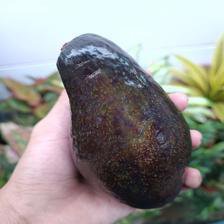

In [ ]:
Image.open(glob("/content/train/*.jpg")[1])

In [ ]:
img_df = pd.DataFrame(glob("/content/train/*.jpg"), columns=["path"])
img_df["id"] = img_df.path.map(lambda x: op.basename(x).replace(".jpg", ""))


label_df = pd.read_csv("/content/all.csv")
train_df = img_df.merge(label_df, on="id")

In [ ]:
img_df

,path,id
0,/content/train/m5_24e.jpg,m5_24e
1,/content/train/m5_56d.jpg,m5_56d
2,/content/train/m9_01e.jpg,m9_01e
3,/content/train/h6_12a.jpg,h6_12a
4,/content/train/m_23e.jpg,m_23e
...,...,...
989,/content/train/m_03e.jpg,m_03e
990,/content/train/m_01d.jpg,m_01d
991,/content/train/m2_41b.jpg,m2_41b
992,/content/train/m2_03ed.jpg,m2_03ed


In [ ]:
print("Number of test images = ", len(glob("/content/test/*.jpg")))
print("Number of train images = ", len(train_df))

Number of test images =  0
Number of train images =  994


In [ ]:
train_df.head()

,path,id,state
0,/content/train/m5_24e.jpg,m5_24e,mayang_state_3
1,/content/train/m5_56d.jpg,m5_56d,mayang_state_3
2,/content/train/m9_01e.jpg,m9_01e,mayang_state_4
3,/content/train/h6_12a.jpg,h6_12a,hass_state_1
4,/content/train/m_23e.jpg,m_23e,mayang_state_3


In [ ]:
train_df.iterrows()

<generator object DataFrame.iterrows at 0x7f843dd6bae0>

In [ ]:
root_dir = "/content/breed_state"
for _, r in train_df.iterrows():
    if not op.exists(f"{root_dir}/{r.state}"):
        os.makedirs(f"{root_dir}/{r.state}")
    shutil.copy(r.path, f"{root_dir}/{r.state}/{r.id}.jpg")

In [ ]:
!rm -r ./content/train

rm: cannot remove './content/train': No such file or directory


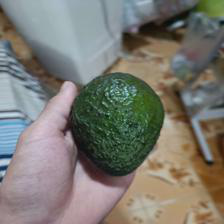

In [ ]:
Image.open("/content/breed_state/hass_state_1/h2_01a.jpg")

In [ ]:
# สำหรับคนที่ยังไม่ได้ลงไลบรารี่ fastbook ให้ uncomment บรรทัด !pip install
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastbook import *

In [ ]:
paths = get_image_files("/content/breed_state")

In [ ]:
paths[6]

Path('/content/breed_state/mayang_state_4/m5_56e.jpg')

In [ ]:
parent_label(paths[6])

'mayang_state_4'

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.3, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
get_image_files("/content/test")

(#102) [Path('/content/test/mayang_state_4/m4_21e.jpg'),Path('/content/test/mayang_state_4/m5_42e.jpg'),Path('/content/test/mayang_state_4/m4_17e.jpg'),Path('/content/test/mayang_state_4/t_01d.jpg'),Path('/content/test/mayang_state_4/m4_16e.jpg'),Path('/content/test/mayang_state_4/m4_12e.jpg'),Path('/content/test/mayang_state_4/m5_40e.jpg'),Path('/content/test/mayang_state_4/m5_37e.jpg'),Path('/content/test/mayang_state_4/m4_13e.jpg'),Path('/content/test/mayang_state_4/m4_10e.jpg')...]

In [ ]:
parent_label("/content/test/001.jpg")

'test'

In [ ]:
dls = fields.dataloaders("/content/breed_state/", bs=6)

In [ ]:
len(dls.vocab)

7

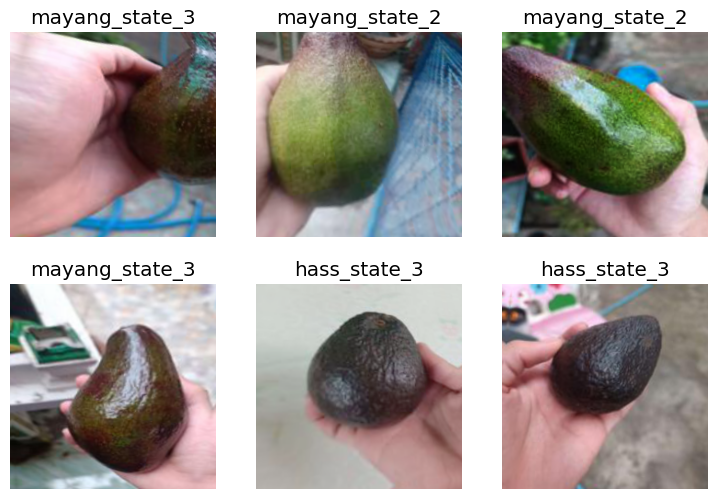

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learner = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 149MB/s]


SuggestedLRs(valley=0.0006918309954926372)

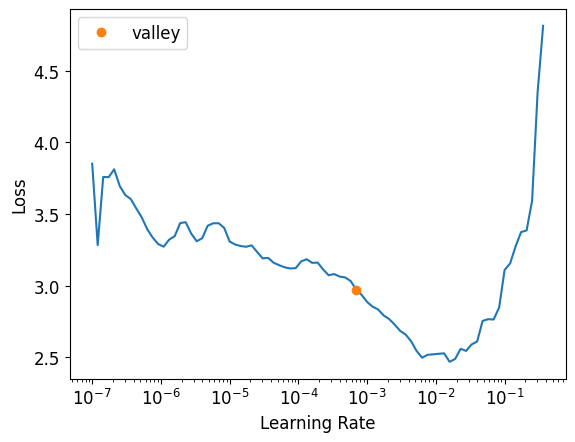

In [ ]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=20, freeze_epochs=1, base_lr=0.0006)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.899978,1.140146,0.312081,0.687919,00:14


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.206629,0.918577,0.271812,0.728188,00:15
1,1.239862,0.780180,0.241611,0.758389,00:15
2,1.142015,0.733261,0.241611,0.758389,00:14
3,1.230894,0.556080,0.211409,0.788591,00:14
4,0.996063,0.726808,0.214765,0.785235,00:15
5,0.847185,0.649877,0.201342,0.798658,00:15
6,0.912625,0.482379,0.161074,0.838926,00:15
7,0.771774,0.402004,0.147651,0.852349,00:15
8,0.666893,0.435905,0.137584,0.862416,00:15
9,0.633290,0.411570,0.144295,0.855705,00:15


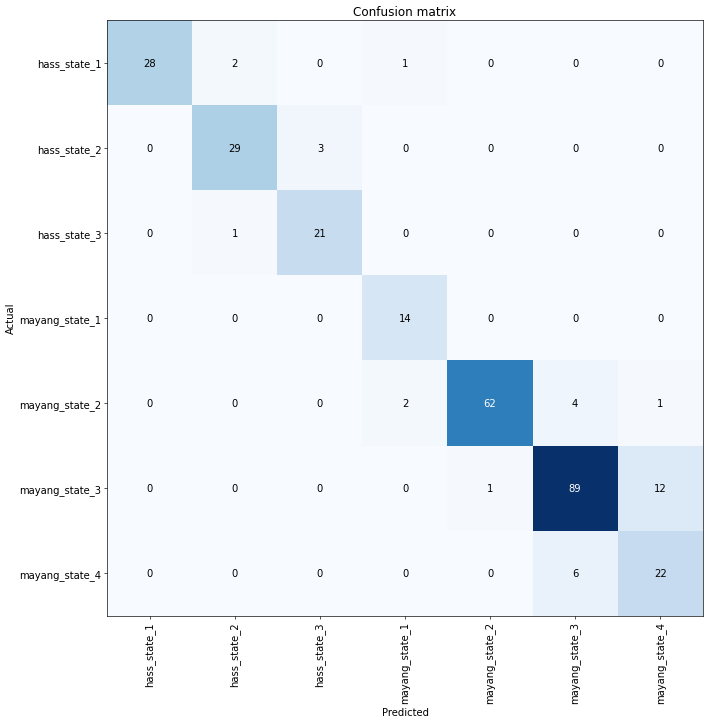

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('mayang_state_3', 'mayang_state_4', 12),
 ('mayang_state_4', 'mayang_state_3', 6),
 ('mayang_state_2', 'mayang_state_3', 4),
 ('hass_state_2', 'hass_state_3', 3),
 ('hass_state_1', 'hass_state_2', 2),
 ('mayang_state_2', 'mayang_state_1', 2)]

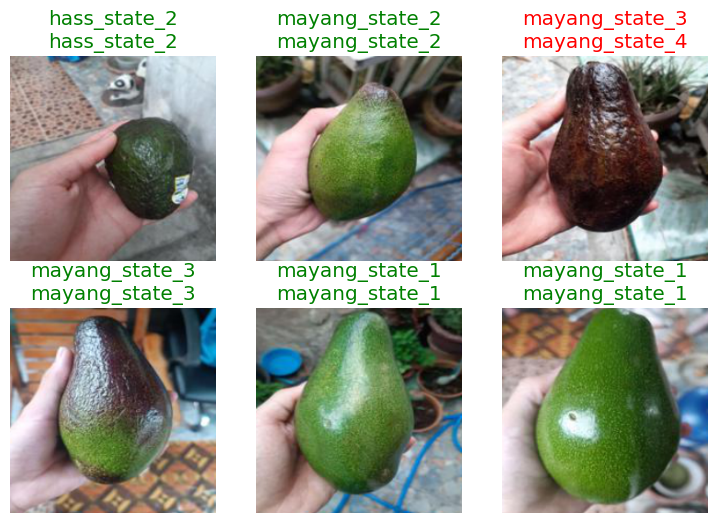

In [ ]:
learner.show_results(shuffle=True)

In [ ]:
learner.export("all_resnet50.pkl")

In [ ]:
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('all_resnet50.pkl')

In [ ]:
# กำหนดขนาดรูปภาพที่ต้องการ resize
size = (224, 224)

# กำหนด path ของโฟลเดอร์ที่เก็บรูปภาพ
path = "/content/test/mayang_state_4"

# วนลูปอ่านและ resize รูปภาพทุกภาพในโฟลเดอร์
for file_name in os.listdir(path):
    if file_name.endswith(".jpg") or file_name.endswith(".jpeg") or file_name.endswith(".png"):
        # อ่านรูปภาพ
        img = Image.open(os.path.join(path, file_name))

        # resize รูปภาพ
        img_resized = img.resize(size)

        # บันทึกรูปภาพที่ resize เรียบร้อยแล้ว
        img_resized.save(os.path.join(path, file_name))

In [ ]:
Image.open("/content/test/IMG_20230530_173613.jpg").resize((224, 224))

In [ ]:
import os

path = '/content/test/mayang_state_3'

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    if os.path.isfile(file_path):  # Check if the path is a file
        print(filename)
        print(learn_inf.predict(file_path))




# path = "/content/test"
# for filename in os.listdir(path):
#     print(filename)
#     print(learn_inf.predict(f"/content/test/{filename}"))

# # for i in range(10):
# #   get_image_files("/content/test")

# learn_inf.predict("/content/test/001.jpg")

In [ ]:
learn_inf.predict("/content/test/state_2/m3_01b.jpg")
# learn_inf.predict("/content/test/state_2/m3_01b.jpg")[2][1]

('mayang_state_2',
 tensor(1),
 tensor([3.8477e-06, 9.9999e-01, 1.0902e-06, 1.3338e-07]))

In [ ]:
!rm -r ./test/test_3.zip

In [ ]:
from tqdm import tqdm
label = []
prediction = []
import glob

for filename in tqdm(glob.glob("/content/test/*/*.jpg")):
  rename = filename.split("/")[3]
  label.append(rename)
  classes,_,_ = learn_inf.predict(filename)
  prediction.append(classes)


  0%|          | 0/102 [00:00<?, ?it/s]

  1%|          | 1/102 [00:00<00:35,  2.84it/s]

  2%|▏         | 2/102 [00:00<00:30,  3.31it/s]

  3%|▎         | 3/102 [00:00<00:28,  3.46it/s]

  4%|▍         | 4/102 [00:01<00:28,  3.49it/s]

  5%|▍         | 5/102 [00:01<00:26,  3.64it/s]

  6%|▌         | 6/102 [00:01<00:23,  4.09it/s]

  7%|▋         | 7/102 [00:01<00:21,  4.37it/s]

  8%|▊         | 8/102 [00:02<00:20,  4.59it/s]

  9%|▉         | 9/102 [00:02<00:19,  4.82it/s]

 10%|▉         | 10/102 [00:02<00:18,  4.92it/s]

 11%|█         | 11/102 [00:02<00:18,  5.00it/s]

 12%|█▏        | 12/102 [00:02<00:17,  5.07it/s]

 13%|█▎        | 13/102 [00:02<00:17,  5.03it/s]

 14%|█▎        | 14/102 [00:03<00:17,  4.94it/s]

 15%|█▍        | 15/102 [00:03<00:22,  3.78it/s]

 16%|█▌        | 16/102 [00:03<00:25,  3.43it/s]

 17%|█▋        | 17/102 [00:04<00:22,  3.78it/s]

 18%|█▊        | 18/102 [00:04<00:20,  4.14it/s]

 19%|█▊        | 19/102 [00:04<00:18,  4.41it/s]

 20%|█▉        | 20/102 [00:04<00:17,  4.61it/s]

 21%|██        | 21/102 [00:04<00:17,  4.75it/s]

 22%|██▏       | 22/102 [00:05<00:16,  4.82it/s]

 23%|██▎       | 23/102 [00:05<00:16,  4.91it/s]

 24%|██▎       | 24/102 [00:05<00:15,  4.96it/s]

 25%|██▍       | 25/102 [00:05<00:15,  4.91it/s]

 25%|██▌       | 26/102 [00:05<00:15,  4.98it/s]

 26%|██▋       | 27/102 [00:06<00:15,  4.95it/s]

 27%|██▋       | 28/102 [00:06<00:15,  4.85it/s]

 28%|██▊       | 29/102 [00:06<00:14,  4.97it/s]

 29%|██▉       | 30/102 [00:06<00:14,  5.01it/s]

 30%|███       | 31/102 [00:06<00:14,  5.03it/s]

 31%|███▏      | 32/102 [00:07<00:14,  5.00it/s]

 32%|███▏      | 33/102 [00:07<00:13,  5.04it/s]

 33%|███▎      | 34/102 [00:07<00:13,  5.09it/s]

 34%|███▍      | 35/102 [00:07<00:13,  5.05it/s]

 35%|███▌      | 36/102 [00:07<00:12,  5.13it/s]

 36%|███▋      | 37/102 [00:08<00:12,  5.04it/s]

 37%|███▋      | 38/102 [00:08<00:12,  5.12it/s]

 38%|███▊      | 39/102 [00:08<00:12,  5.11it/s]

 39%|███▉      | 40/102 [00:08<00:12,  5.13it/s]

 40%|████      | 41/102 [00:08<00:11,  5.12it/s]

 41%|████      | 42/102 [00:09<00:11,  5.08it/s]

 42%|████▏     | 43/102 [00:09<00:11,  5.10it/s]

 43%|████▎     | 44/102 [00:09<00:11,  5.08it/s]

 44%|████▍     | 45/102 [00:09<00:11,  5.11it/s]

 45%|████▌     | 46/102 [00:09<00:10,  5.17it/s]

 46%|████▌     | 47/102 [00:10<00:10,  5.13it/s]

 47%|████▋     | 48/102 [00:10<00:10,  5.10it/s]

 48%|████▊     | 49/102 [00:10<00:10,  5.14it/s]

 49%|████▉     | 50/102 [00:10<00:10,  5.19it/s]

 50%|█████     | 51/102 [00:10<00:09,  5.15it/s]

 51%|█████     | 52/102 [00:11<00:09,  5.17it/s]

 52%|█████▏    | 53/102 [00:11<00:09,  5.03it/s]

 53%|█████▎    | 54/102 [00:11<00:09,  4.93it/s]

 54%|█████▍    | 55/102 [00:11<00:10,  4.42it/s]

 55%|█████▍    | 56/102 [00:12<00:11,  4.08it/s]

 56%|█████▌    | 57/102 [00:12<00:11,  3.76it/s]

 57%|█████▋    | 58/102 [00:12<00:11,  3.67it/s]

 58%|█████▊    | 59/102 [00:12<00:11,  3.61it/s]

 59%|█████▉    | 60/102 [00:13<00:11,  3.57it/s]

 60%|█████▉    | 61/102 [00:13<00:11,  3.57it/s]

 61%|██████    | 62/102 [00:13<00:11,  3.45it/s]

 62%|██████▏   | 63/102 [00:14<00:11,  3.37it/s]

 63%|██████▎   | 64/102 [00:14<00:11,  3.32it/s]

 64%|██████▎   | 65/102 [00:14<00:11,  3.28it/s]

 65%|██████▍   | 66/102 [00:15<00:10,  3.31it/s]

 66%|██████▌   | 67/102 [00:15<00:10,  3.20it/s]

 67%|██████▋   | 68/102 [00:15<00:10,  3.23it/s]

 68%|██████▊   | 69/102 [00:15<00:10,  3.29it/s]

 69%|██████▊   | 70/102 [00:16<00:09,  3.35it/s]

 70%|██████▉   | 71/102 [00:16<00:09,  3.37it/s]

 71%|███████   | 72/102 [00:16<00:08,  3.34it/s]

 72%|███████▏  | 73/102 [00:17<00:08,  3.34it/s]

 73%|███████▎  | 74/102 [00:17<00:08,  3.34it/s]

 74%|███████▎  | 75/102 [00:17<00:07,  3.39it/s]

 75%|███████▍  | 76/102 [00:17<00:07,  3.52it/s]

 75%|███████▌  | 77/102 [00:18<00:06,  3.89it/s]

 76%|███████▋  | 78/102 [00:18<00:05,  4.18it/s]

 77%|███████▋  | 79/102 [00:18<00:05,  4.31it/s]

 78%|███████▊  | 80/102 [00:18<00:04,  4.49it/s]

 79%|███████▉  | 81/102 [00:18<00:04,  4.62it/s]

 80%|████████  | 82/102 [00:19<00:04,  4.71it/s]

 81%|████████▏ | 83/102 [00:19<00:03,  4.82it/s]

 82%|████████▏ | 84/102 [00:19<00:03,  4.75it/s]

 83%|████████▎ | 85/102 [00:19<00:03,  4.77it/s]

 84%|████████▍ | 86/102 [00:19<00:03,  4.85it/s]

 85%|████████▌ | 87/102 [00:20<00:03,  4.86it/s]

 86%|████████▋ | 88/102 [00:20<00:02,  4.97it/s]

 87%|████████▋ | 89/102 [00:20<00:02,  4.86it/s]

 88%|████████▊ | 90/102 [00:20<00:02,  4.93it/s]

 89%|████████▉ | 91/102 [00:21<00:02,  4.93it/s]

 90%|█████████ | 92/102 [00:21<00:02,  4.97it/s]

 91%|█████████ | 93/102 [00:21<00:01,  4.93it/s]

 92%|█████████▏| 94/102 [00:21<00:01,  4.91it/s]

 93%|█████████▎| 95/102 [00:21<00:01,  4.91it/s]

 94%|█████████▍| 96/102 [00:22<00:01,  4.91it/s]

 95%|█████████▌| 97/102 [00:22<00:01,  4.92it/s]

 96%|█████████▌| 98/102 [00:22<00:00,  4.97it/s]

 97%|█████████▋| 99/102 [00:22<00:00,  4.87it/s]

 98%|█████████▊| 100/102 [00:22<00:00,  4.85it/s]

 99%|█████████▉| 101/102 [00:23<00:00,  4.82it/s]

100%|██████████| 102/102 [00:23<00:00,  4.39it/s]


In [ ]:
from tqdm import tqdm
label = []
prediction = []
import glob

for filename in tqdm(glob.glob("/content/test/*/*.jpg")):
  rename = "hass_"+filename.split("/")[3]
  label.append(rename)
  classes,_,_ = learner.predict(filename)
  prediction.append(classes)


In [ ]:
from tqdm import tqdm
import glob
from PIL import Image

label = []
prediction = []

for filename in tqdm(glob.glob("/content/test/*/*.jpg") + glob.glob("/content/test/*/*.png")):
    rename = "mayang_" + filename.split("/")[3]
    label.append(rename)
    classes, _, _ = learn_inf.predict(filename)
    prediction.append(classes)


In [ ]:
from tqdm import tqdm
import glob
from PIL import Image

label = []
prediction = []

for filename in tqdm(glob.glob("/content/test/*/*.jpg")):
    rename = "mayang_" + filename.split("/")[3]
    label.append(rename)
    classes, _, _ = learner.predict(filename)
    prediction.append(classes)


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(label,prediction, average="micro")

0.7450980392156863

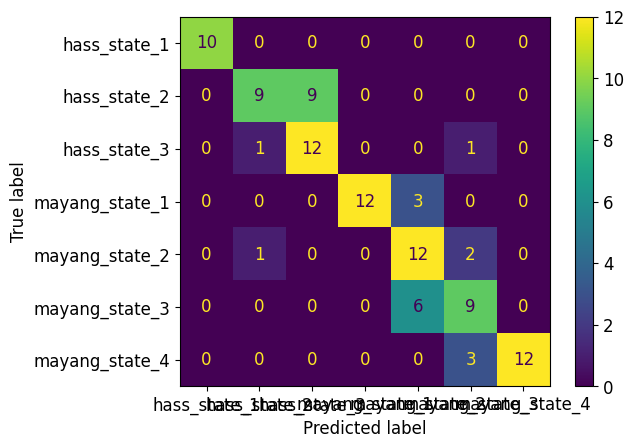

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.unique(prediction))

cm_display.plot()
plt.show()

In [ ]:
classes,_,_ = learner.predict("/content/test/state_1/t_01a.jpg")

In [ ]:
print(classes)

mayang_state_1
